# Introducrtion to Machine Learning: Assignment #4
## Submission date: 21\03\2024, 23:55.
### Topics:
- PCA
- K means clustering
- AdaBoost

Submitted by:

Or Dinar 207035809

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be reasonably documented

· Try to keep the code as clean, concise, and short as possible

· Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to disciplinary actions.

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).

## Question 1 - Clustering

We learned in the tutorials about partitional clustering and specifically – k means algorithm. <br/>
In this question you will implement it and see some nice applications.

import libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Complete the missing implementation of Kmeans. Since there are k clusters, we will label each point with {0,..,k-1}.

In [13]:
class Kmeans:

	def __init__(self, n_clusters, max_iter=100, random_state=123):
		self.n_clusters = n_clusters
		self.max_iter = max_iter
		self.random_state = random_state

	def initialize_centroids(self, X):
		np.random.RandomState(self.random_state)
		random_idx = np.random.permutation(X.shape[0])
		centroids = X[random_idx[:self.n_clusters]]
		return centroids

	def reassign_centroids(self, X, labels):
		centroids = np.zeros((self.n_clusters, X.shape[1]))
		for k in range(self.n_clusters):
			centroids[k] = np.mean(X[labels == k], axis=0)
		return centroids

	def compute_distance(self, X, centroids):
		distance = np.zeros((X.shape[0], self.n_clusters))
		for k in range(self.n_clusters):
			row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
			distance[:, k] = np.square(row_norm)
		return distance

	def find_closest_cluster(self, distance):
		return np.argmin(distance, axis=1)

	def compute_sse(self, X, labels, centroids):
		distance = np.zeros(X.shape[0])
		for k in range(self.n_clusters):
			distance[labels == k] = np.linalg.norm(X[labels == k] - centroids[k], axis=1)
		return np.sum(np.square(distance))

	def fit(self, X):
		self.centroids = self.initialize_centroids(X)
		for i in range(self.max_iter):
			old_centroids = self.centroids
			distance = self.compute_distance(X, self.centroids)
			# For each point, calculate distance to all k clustes.
			self.labels = self.find_closest_cluster(distance)
			self.centroids = self.reassign_centroids(X, self.labels)
			if np.all(old_centroids == self.centroids):
				break
		self.error = self.compute_sse(X, self.labels, self.centroids)

	def predict(self, X):
		distance = self.compute_distance(X, self.centroids)
		return self.find_closest_cluster(distance)

Load exams data, convert to numpy and plot it. <br/>
The data can be found here: https://sharon.srworkspace.com/ml/datasets/hw4/exams.csv

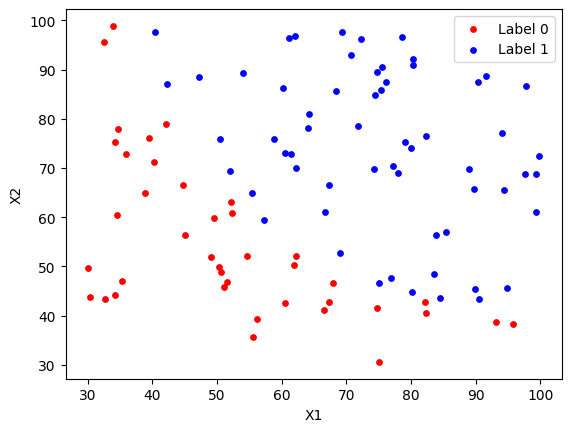

In [14]:
data = pd.read_csv("https://sharon.srworkspace.com/ml/datasets/hw4/exams.csv", header=None)
data = data.to_numpy()

x = data[:,:-1]
y = data[:,-1]

zero_labeled_samples = x[y == 0]
one_labeled_samples = x[y == 1]

plt.scatter(zero_labeled_samples[:, 0], zero_labeled_samples[:, 1], color='red', label='Label 0', s=15)
plt.scatter(one_labeled_samples[:, 0], one_labeled_samples[:, 1], color='blue', label='Label 1', s=15)

plt.xlabel('X1')
plt.ylabel('X2')

plt.legend()
plt.show()

We are going to divide the data into 2 clusters. <br/>
Define Kmeans object and fit the data.

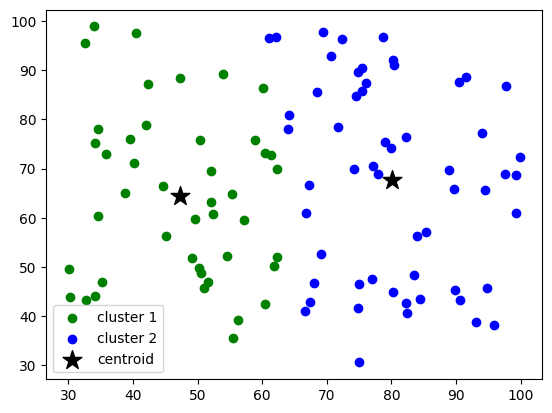

In [15]:
n_clusters = 2
clust = Kmeans(n_clusters)

clust.fit(x)

labels = clust.labels
centroids = clust.centroids

c0 = x[labels == 0]
c1 = x[labels == 1]

plt.scatter(c0[:, 0], c0[:, 1], c='green', label='cluster 1')
plt.scatter(c1[:, 0], c1[:, 1], c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='centroid')
plt.legend()

plt.show()

Use the Elbow Method to choose another number of centroids between 1-10. <br/>
<font color='aqua'>I chose the clusters to be 5 because in the elbow method graph 5 seems to be where the change between the best variance of the number of clusters was the least drastic (I mean the change between 5 clusters and 6 clusters)</font>

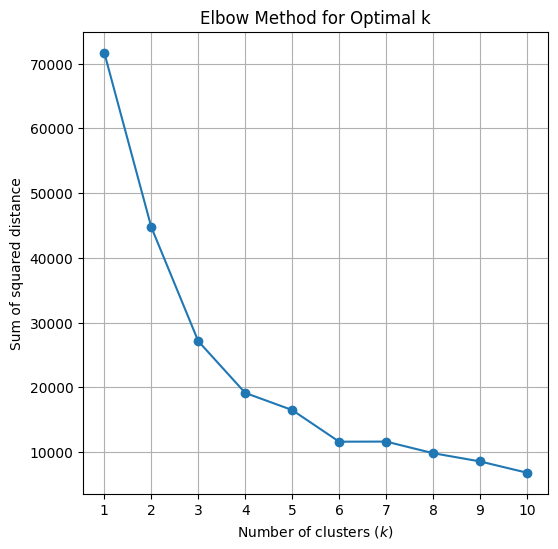

In [16]:
sse = []
list_k = list(range(1, 11))

for k in list_k:
    # Initialize and fit KMeans model
    clust = Kmeans(n_clusters=k)
    clust.fit(data[:, :2])  # Use only first two columns as features
    sse.append(clust.error)  # Append SSE for current clustering

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters ($k$)')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for Optimal k')
plt.xticks(list_k)
plt.grid(True)
plt.show()

Apply clustering with the selected k

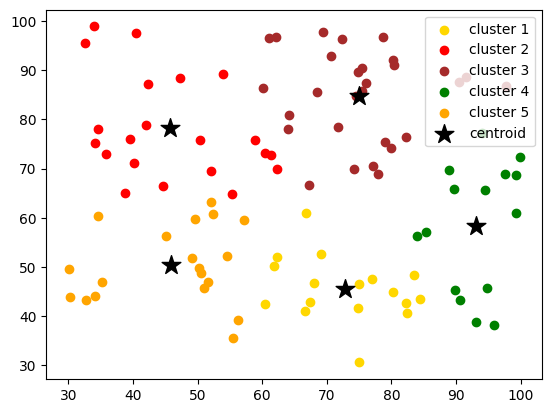

In [17]:
n_clusters = 5
clust = Kmeans(n_clusters)

clust.fit(x)

labels = clust.labels
centroids = clust.centroids

c0 = x[clust.labels == 0]
c1 = x[clust.labels == 1]
c2 = x[clust.labels == 2]
c3 = x[clust.labels == 3]
c4 = x[clust.labels == 4]

plt.scatter(c0[:, 0], c0[:, 1], c='gold', label='cluster 1')
plt.scatter(c1[:, 0], c1[:, 1], c='red', label='cluster 2')
plt.scatter(c2[:, 0], c2[:, 1], c='brown', label='cluster 3')
plt.scatter(c3[:, 0], c3[:, 1], c='green', label='cluster 4')
plt.scatter(c4[:, 0], c4[:, 1], c='orange', label='cluster 5')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='centroid')
plt.legend()

plt.show()

Now, you will compress some image using k-means. <br/>
Here, you are given image from size 400x600x3. The last parameter is the number of channels. 3 channels means that the image is colored (unlike 1 in, which is grayscale). <br/>
Our goal is to reduce the number of colors to 20 and represent (compress) the photo using those 20 colors only. <br/>

Motivation: the original image requires 400x600x3x8 bits, while the new image will require only 400x600x5 + 20x24 bits, almost 5 times smaller!<br/>
To really do this, we will take the image and treat every pixel as a data point, where each data point is in 3d space (r,g,b). Then, we cluster into 20 centroids, and we assign each pixel to a centroid. This will allow us to represent the image using only 20 colors.


### helper function

In [18]:
import urllib.request

def read_image(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    return cv2.imdecode(arr, -1)

Complete the missing code

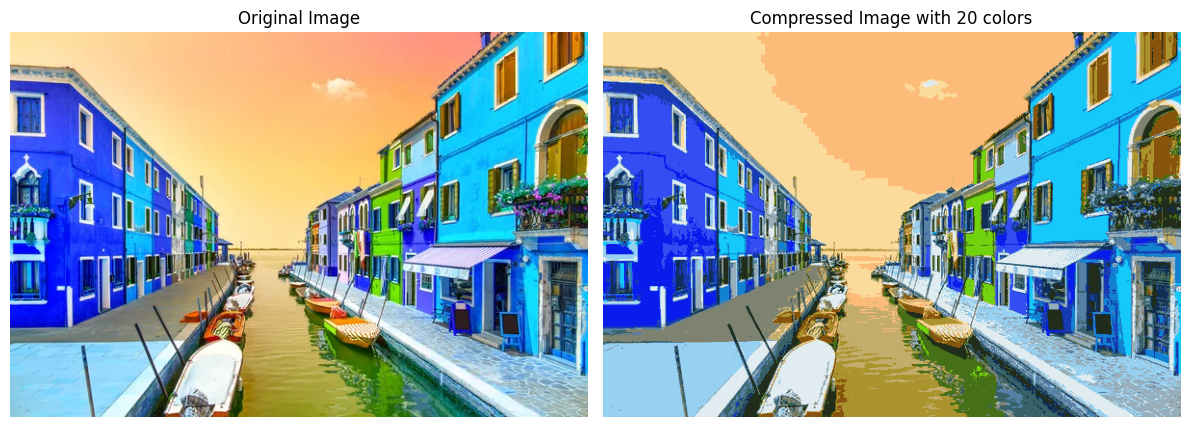

In [19]:
from sklearn.cluster import KMeans
import cv2

img = read_image('https://sharon.srworkspace.com/ml/datasets/hw4/image.jpg')
img_size = img.shape

#Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])		# Turn hxwx3 into (h*w)x3

# Run the Kmeans algorithm
km = KMeans(n_clusters=20)
km.fit(X)

'''
The km has the following properties:
(*) km.labels_ is an array size (pixels, 20), will give each pixel its class from 20 classes (values are between 0-19)
(*) km.cluster_centers_ is an array size 20x3, where the ith row represents the color value for the ith label.
	For example, cluster_centers_[0] = [r,g,b], the first center.
'''

# Use the centroids to compress the image
img_compressed = km.cluster_centers_[km.labels_]
img_compressed = np.clip(img_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3'''
img_compressed = img_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other'''
fig, ax = plt.subplots(1, 2, figsize = (12, 8))

ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].imshow(img_compressed)
ax[1].set_title(f'Compressed Image with {km.n_clusters} colors')

for ax in fig.axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Question 2 - AdaBoost
See attached pdf in moodle assignment!

## load smiling dataset

In the rest of the assignment, we will deal with the Smiling-face dataset, which determines if a person is smiling or not. <br/>
Your task is: run the following section and make sure your understand what's going on.

Go to your <a href="https://www.kaggle.com/">Kaggle</a> account and under the settings, generate new API token. <br/>
This will give you the json file, which you will upload here.

In [8]:
# The algorithm expects you to upload JSON file to it!

! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download chazzer/smiling-or-not-face-data
! unzip -q smiling-or-not-face-data.zip -d data

ModuleNotFoundError: No module named 'google'

import libraries

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

process the images

In [ ]:
def proccess_data(folder):
  image_arrays = []
  for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_arrays.append(gray_image)
  return np.array(image_arrays)

smile = proccess_data('./data/smile')
non_smile = proccess_data('./data/non_smile')

dataset = np.vstack((smile,non_smile))
labels = np.concatenate((np.ones(smile.shape[0]),np.zeros(non_smile.shape[0])))

display smiling and non-smiling image.

In [ ]:
plt.subplot(121)
plt.title("Smile")
plt.imshow(smile[0], cmap='gray')

plt.subplot(122)
plt.title("Not smile")
plt.imshow(non_smile[0], cmap='gray')

plt.show()

print the smiling and non-smiling data + the united dataset along with labels.

In [ ]:
print(f'smile array size is (images, height, width)={smile.shape}')
print(f'non smile array size is (images, height, width)={non_smile.shape}')
print()
print(f'dataset array size is {dataset.shape}')
print(f'labels array size is {labels.shape}')

Prepear train and test datasets, print their structure. Since you have to deal with 1d features, we flatten the squared image

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.2, stratify=labels, random_state=42)

print(f'train size is {x_train.shape} and labels size is {y_train.shape}')
print(f'test size is {x_test.shape} and labels size is {y_test.shape}')
print()

x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print(f'flattened train size is {x_train_flatten.shape} ')
print(f'flattened test size is {x_test_flatten.shape}')

## Question 3 - PCA

import libraries

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

Implement PCA to reduce the dimension of the images from 4096=64x64 to 81=9x9. For time effciency, DONT use any loops here.

Hint: Implement inverse_transform to recover the original vector from the compressed one.

In [ ]:
# shrinks the data matrix to have k features
def PCA_train(data, k):
    mean = np.mean(data, axis=0)
    Z = data - mean
    scatter_mastrix = np.matmul(Z.transpose(), Z)
    eigenvals, eigenvecs = np.linalg.eig(scatter_mastrix)
    best_k_indices = np.argsort(eigenvals)[::-1][:k]
    E = eigenvecs[:, best_k_indices].transpose()
    y = np.matmul(E, Z.transpose())
    return y
    

def PCA_test(test, mu, E):
	# Implement here

def recover_PCA(data, mu, E):
	# Implement here

Apply the PCA. <br/>
Make sure you fit the PCA model only to the training set (but apply it to both training and test sets). <br/>

In [ ]:
x_train_new, mu, eig = # Implement here
x_test_new = # Implement here

Pick another random image and show the result of applying PCA to it, and then try to recover the whole size again.

In [ ]:
plt.subplot(131)
plt.title("Original Image")
plt.imshow(None, cmap='gray')

plt.subplot(132)
plt.title("Image in lower dimension")
plt.imshow(None, cmap='gray')

plt.subplot(133)
plt.title("Recovered Image")
plt.imshow(None, cmap='gray')

plt.show()

Before training the model, use EIG_CDF, that given eigenvalues, draws a CDF of them like here:<br/><br/>

![Picture1.jpg](https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcS3mOZk1x4X3ap9nuMnst5W5pMgOXF8r3Tmx1QcFX9mba_lleuB)

As seen in the tutorials, we use them to see how much "energy" we preserve from the data. Use this to choose optimal dimension to reduce into, such the preserves 95% of the energy.

In [ ]:
def EIG_CDF(eig_list):
	sorted_eigenvalues = np.sort(eig_list)[::-1]

	eigenvalues_cumsum = np.cumsum(sorted_eigenvalues)

	eigenvalues_cumsum_normalized = eigenvalues_cumsum / eigenvalues_cumsum[-1]
	amount = # Implement here

	plt.plot(np.arange(1, len(sorted_eigenvalues)+1), eigenvalues_cumsum_normalized)
	plt.xlabel('Principal Component')
	plt.ylabel('Cumulative Proportion of Variance')
	plt.title(f'CDF of Eigenvalues - {amount} eigs preserves 95% of enetry')
	plt.show()

# Call to EIG_CDF

For the same image as before, show the result of applying PCA to it and recovering.<br/>
Is the result better? What is different from 81 dimensions? <br/>
<font color='red'>Write here your answer and explain it</font>

In [ ]:
plt.subplot(131)
plt.title("Original Image")
plt.imshow(None, cmap='gray')

plt.subplot(132)
plt.title("Image in lower dimension")
plt.imshow(None, cmap='gray')

plt.subplot(133)
plt.title("Recovered Image")
plt.imshow(None, cmap='gray')

plt.show()

Now, you are ready to train the model. Use KNN, tune the best k using cross_val_score (with sklearn)

In [ ]:
# Implement here

plt.figure(figsize=(14,5))
plt.plot(ks, accs)
plt.xlabel('k')
plt.xticks(ks)
plt.ylabel('avg accuracy')
plt.show()

Print the accuracy of your model on the test set.

In [ ]:
# Implement here
print(f'acc on test is {acc}')

Answer the following sum-up questions: <br/>
- What pre-proccessing actions were done on the data?
- Give two reasons for not applying Standard Scaler on this task.
- Recall the KNN is using euclidian distance metric. Is it possible that switching distance metric will yield better result? What distance metric?

<font color='red'>Write here your answers, with explainations</font>


## Question 4 - 10 points bonus

4 points - Use KNN with the metric that you answered that will be the best. Find the best possible k and print the accuracy test.

In [ ]:
# Input: x, y with d features.
# Output: the distance between them by the chosen metric.

def Your_Metric(x, y):
  # Implement here

Print the accuracy of your model on the test set. Were you correct? If no, why do you think it happened? What else could be done? <br/>

<font color='red'>Write here your answer</font>

In [ ]:
# Implement here
print(f'acc on test is {acc}')

6 points - make the best model that you can, using all the models we have seen through this course. <br/>
<font color='red'>Write here all your decisions you made and the motivation behind them.</font>

In [ ]:
# Implement here